In [2]:
# IMPORT NECESSARY LIBRARIES
import numpy as np
from tensorflow.keras import layers, models, Model, optimizers
import tensorflow as tf
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator, load_img
import pandas as pd
from sklearn.metrics import confusion_matrix
import sys
import matplotlib.pyplot as plt
import itertools

import warnings
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
import keras
from keras.models import Sequential, Model, model_from_json
from keras.layers import Conv1D, MaxPooling2D, AveragePooling1D
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Dense, Embedding, LSTM
from keras.regularizers import l2
from keras.constraints import max_norm
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import shuffle
from tensorflow.python.keras import layers, models, Model, optimizers
from tensorflow.keras import regularizers
from tensorflow.keras import layers, models, Model, optimizers
from tensorflow.keras.utils import to_categorical
from keras.utils import np_utils
from random import randint
from sklearn.preprocessing import LabelEncoder
from keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from matplotlib import pyplot

In [3]:
import glob
angry = glob.glob('trainclasses/angry/*.*')
calm = glob.glob('trainclasses/calm/*.*')
disgust = glob.glob('trainclasses/disgust/*.*')
fearful = glob.glob('trainclasses/fearful/*.*')
happy = glob.glob('trainclasses/happy/*.*')
neutral = glob.glob('trainclasses/neutral/*.*')
sad = glob.glob('trainclasses/sad/*.*')
surprised = glob.glob('trainclasses/surprised/*.*')

In [4]:
train_data = []
train_labels = []

for i in angry:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    train_data.append(image)
    train_labels.append('Angry')
for i in calm:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    train_data.append(image)
    train_labels.append('Calm')
for i in disgust:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    train_data.append(image)
    train_labels.append('Disgust')
for i in fearful:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    train_data.append(image)
    train_labels.append('Fearful')
for i in happy:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    train_data.append(image)
    train_labels.append('Happy')
for i in neutral:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    train_data.append(image)
    train_labels.append('Neutral')
for i in sad:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    train_data.append(image)
    train_labels.append('Sad')
for i in surprised:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    train_data.append(image)
    train_labels.append('Surprised')

train_data = np.array(train_data)
train_labels = np.array(train_labels)

In [5]:
X_train=train_data
y_train=train_labels

In [6]:
import glob
angry = glob.glob('testclasses/angry/*.*')
calm = glob.glob('testclasses/calm/*.*')
disgust = glob.glob('testclasses/disgust/*.*')
fearful = glob.glob('testclasses/fearful/*.*')
happy = glob.glob('testclasses/happy/*.*')
neutral = glob.glob('testclasses/neutral/*.*')
sad = glob.glob('testclasses/sad/*.*')
surprised = glob.glob('testclasses/surprised/*.*')

In [7]:
test_data = []
test_labels = []

for i in angry:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    test_data.append(image)
    test_labels.append('Angry')
for i in calm:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    test_data.append(image)
    test_labels.append('Calm')
for i in disgust:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    test_data.append(image)
    test_labels.append('Disgust')
for i in fearful:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    test_data.append(image)
    test_labels.append('Fearful')
for i in happy:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    test_data.append(image)
    test_labels.append('Happy')
for i in neutral:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    test_data.append(image)
    test_labels.append('Neutral')
for i in sad:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    test_data.append(image)
    test_labels.append('Sad')
for i in surprised:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
    image=np.array(image)
    test_data.append(image)
    test_labels.append('Surprised')

test_data = np.array(test_data)
test_labels = np.array(test_labels)

In [8]:
X_test=test_data
y_test=test_labels

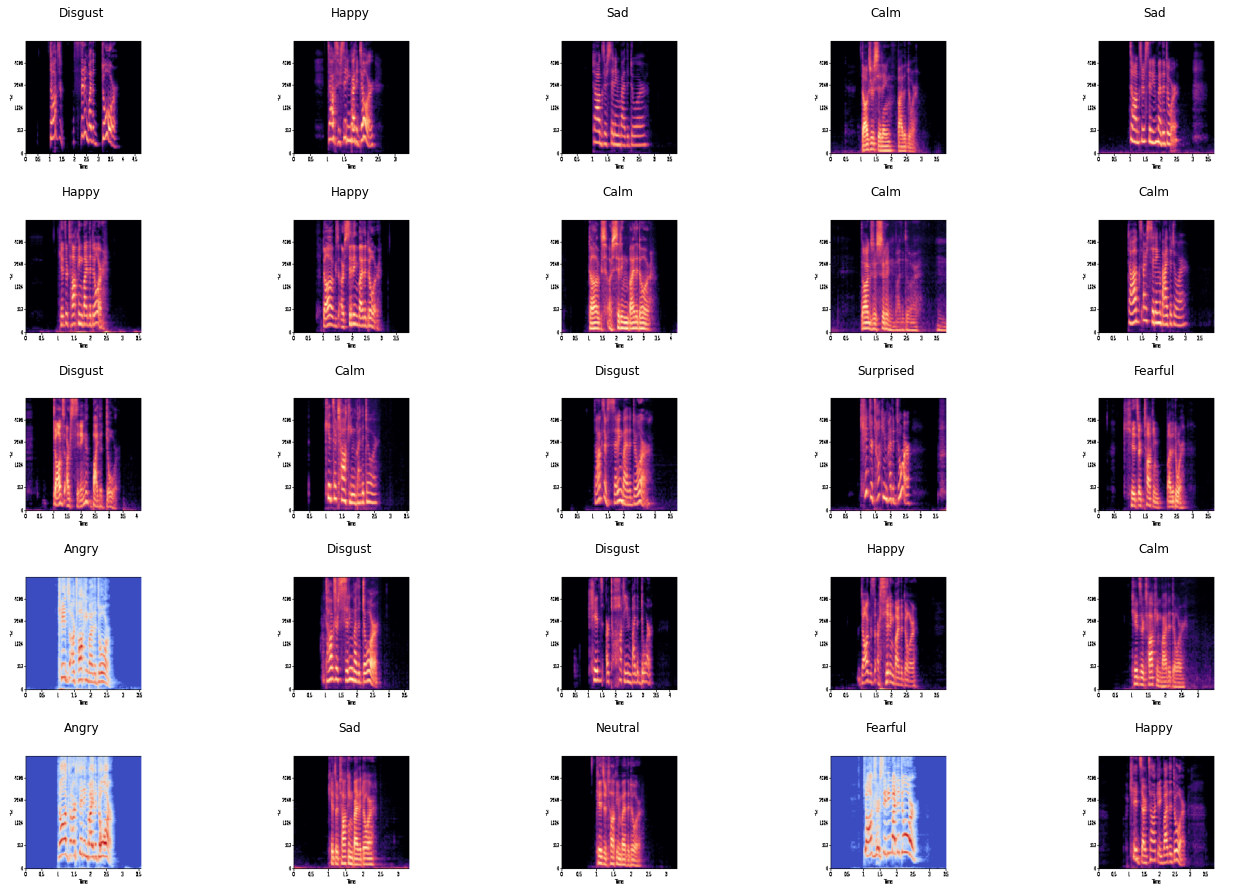

In [9]:
def get_classlabel(class_code):
    labels = {'Angry':'Angry', 'Calm':'Calm', 'Disgust':'Disgust', 'Fearful':'Fearful', 'Happy':'Happy', 'Neutral':'Neutral','Sad':'Sad','Surprised':'Surprised'}
    
    return labels[class_code]

f,ax = plt.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(train_data))
        ax[i,j].imshow(train_data[rnd_number])
        ax[i,j].set_title(get_classlabel(train_labels[rnd_number]))
        ax[i,j].axis('off')

In [10]:
# Check shapes of training and testing sets
print('X_train has a shape of {}, y_train has a shape of {}'.format(X_train.shape,y_train.shape))
print('X_test has a shape of {}, y_test has a shape of {}'.format(X_test.shape,y_test.shape))

X_train has a shape of (1200, 224, 224, 3), y_train has a shape of (1200,)
X_test has a shape of (240, 224, 224, 3), y_test has a shape of (240,)


In [11]:
# Finally, we normalize pixels in X_train and X_test to the range [0,1] for faster convergence
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [12]:
lb = LabelEncoder()

y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

In [13]:
from tensorflow.keras.applications import VGG16

vgg_model = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

58900480/58889256 [==============================] - 3s 0us/step


In [14]:
for layer in vgg_model.layers[:15]:
    layer.trainable = False

In [15]:
x = vgg_model.output
x = Flatten()(x) # Flatten dimensions to for use in FC layers
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x) # Dropout layer to reduce overfitting
x = Dense(256, activation='relu')(x)
x = Dense(8, activation='softmax')(x) # Softmax for multiclass
transfer_model = Model(inputs=vgg_model.input, outputs=x)

In [16]:
for i, layer in enumerate(transfer_model.layers):
    print(i, layer.name, layer.trainable)

0 input_1 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 True
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool True
19 flatten True
20 dense True
21 dropout True
22 dense_1 True
23 dense_2 True


In [17]:
# reduce learning rate when val_accuracy has stopped improving
lr_reduce = ReduceLROnPlateau(monitor='val_accuracy', 
                              patience = 2, 
                              verbose=1,
                              factor=0.95, 
                              min_lr=0.000001)

checkpoint = ModelCheckpoint('ftzq.h15', monitor= 'val_accuracy', mode= 'max', save_best_only = True, verbose= 1)

In [18]:
train_datagen = ImageDataGenerator(
                                    zoom_range=0.3,
                                   rotation_range=20,
                                   width_shift_range=0.15)
#                                   #  height_shift_range=0.4,
#                                   #  shear_range=0.3,
#                                   #  horizontal_flip=True, 
#                                   #  fill_mode='nearest')

train_generator = train_datagen.flow(X_train,
                                     y_train,
                                     batch_size=1)

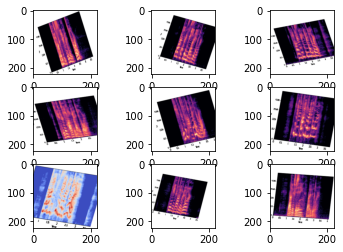

In [19]:
img_rows, img_cols = 224, 224

for x, y in train_datagen.flow(X_train, y_train, batch_size=9):
    # Show the first 9 images
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(x[i].reshape(img_rows, img_cols, 3))
    # show the plot
    pyplot.show()
    break

In [20]:
from tensorflow.keras import layers, models, Model, optimizers

learning_rate= 5e-5
transfer_model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(lr=learning_rate), metrics=["accuracy"])

history = transfer_model.fit_generator(train_generator,
                    # steps_per_epoch=10,
                    validation_data=(X_test,y_test),
                    # validation_steps=20,
                    epochs=80,
                    callbacks=[lr_reduce,checkpoint])
                    # shuffle=True)

Epoch 1/80
1200/1200 [==============================] - ETA: 0s - loss: 2.0483 - accuracy: 0.1708
Epoch 00001: val_accuracy improved from -inf to 0.32083, saving model to ftzq.h15
INFO:tensorflow:Assets written to: ftzq.h15/assets
1200/1200 [==============================] - 227s 189ms/step - loss: 2.0483 - accuracy: 0.1708 - val_loss: 2.1248 - val_accuracy: 0.3208 - lr: 5.0000e-05
Epoch 2/80
1200/1200 [==============================] - ETA: 0s - loss: 1.8301 - accuracy: 0.3033
Epoch 00002: val_accuracy improved from 0.32083 to 0.37917, saving model to ftzq.h15
INFO:tensorflow:Assets written to: ftzq.h15/assets
1200/1200 [==============================] - 226s 189ms/step - loss: 1.8301 - accuracy: 0.3033 - val_loss: 1.7478 - val_accuracy: 0.3792 - lr: 5.0000e-05
Epoch 3/80
1200/1200 [==============================] - ETA: 0s - loss: 1.6103 - accuracy: 0.4033
Epoch 00003: val_accuracy improved from 0.37917 to 0.46250, saving model to ftzq.h15
INFO:tensorflow:Assets written to: ftzq.h15/

In [21]:
transfer_model.save_weights("vgg16fineaugment_weights.h5")
transfer_model.save('vgg16fineaugment.h5')
print("Saved model to disk")

Saved model to disk


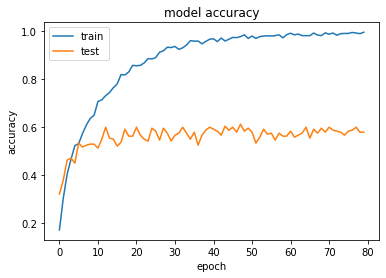

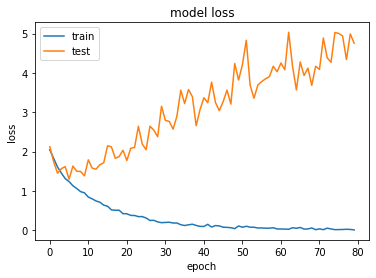

In [22]:
        # PRINT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')

plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Accuracy.png')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('Augmented_Model_Loss.png')
plt.show()

In [23]:

from tensorflow import keras
model = keras.models.load_model('vgg16fineaugment.h5')

In [24]:
y_pred = transfer_model.predict(X_test)
Y_pred_classes = np.argmax(y_pred,axis=1) 
Y_true = np.argmax(y_test,axis=1)
dict_characters = {0: 'angry', 1: 'calm', 2: 'disgust', 3: 'fearful', 4: 'happy', 5: 'neutral', 6: 'sad', 7: 'surprised'}

In [25]:
from sklearn.metrics import classification_report
print(classification_report(Y_true, Y_pred_classes, target_names = ['angry','calm','disgust','fearful','happy','neutral','sad','surprised']))

              precision    recall  f1-score   support

       angry       0.60      0.81      0.69        32
        calm       0.69      0.62      0.66        32
     disgust       0.55      0.66      0.60        32
     fearful       0.59      0.53      0.56        32
       happy       0.57      0.25      0.35        32
     neutral       0.50      0.44      0.47        16
         sad       0.34      0.41      0.37        32
   surprised       0.77      0.84      0.81        32

    accuracy                           0.58       240
   macro avg       0.58      0.57      0.56       240
weighted avg       0.58      0.58      0.57       240

